# Physics 559 - Gravitation and Cosmology - HW5

## Tucker Knaak - Department of Physics, Creighton University - Fall 2022

#### 2. The binding energy of the gorund state of atomic hydrogen is $B=13.6$eV and for $T<B$ we expect that the electrons would recombine with the protons to form atoms.  Because the cross section for photon hydrogen scattering is less than that for photon-electron scattering, the recombination precipitates the decoupling of matter and photons, making the Universe effectively transparent.  In this problem we'll estimate the temperature at which the universe became transparent and teh number of electrons which remain unbound.

##### (a) Prove the Saha equation $\frac{n_H}{n_pn_e}=\left(\frac{2\pi m_H}{m_em_pT}\right)^{3/2}e^{B/T}\approx\left(\frac{2\pi}{m_eT}\right)^{3/2}e^{B/T}$.

##### (b) Show that the Saha equation can be rewritten in terms of the ionization fraction as $\frac{1-X_e}{X_e^2}=\eta\frac{2.4}{\pi^2}\left(\frac{2\pi T}{m_e}\right)^{3/2}e^{B/T}$.  Note that $\langle \sigma_{rec}\vert v\vert\rangle=1.4\left(\frac{1\text{eV}}{T}\right)^{1/2}10^{-13}\text{cm}^3\text{s}^{-1}$, $\sigma_R=\sigma_T\left(\frac{E_{\gamma}}{B}\right)^4$, and $\sigma_T=6.65\times10^{-25}\text{cm}^2$.

##### (c) For a series of temperatures between 0.3 and 0.2eV, calculate the expansion rate $H(T)$, the equilibrium hydrogen ionization fraction $X_e(T)$, and the equilibrium rates $\Gamma_R(T)$, $\Gamma_T(T)$, and $\Gamma_{rec}(T)$.  Assume $\Omega_m=0.3$ and $\eta=5\times10^{-10}$.

##### (d) Estimate the temperature when $\Gamma_T+\Gamma_R$ becomes smaller than $H(T)$.  This is the temperature when the universe becomes transparent to photons.

##### (e) Estimate the temperature when the recombination rate becomes smaller than the expansion rate.  What is the fraction of hydrogen that remains ionized?

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''Given constants'''
c = 3 * 10**10           #speed of light [cm / s]
B = 13.6                 #binding energy [eV]
T0 = 2.33 * 10**-4       #CMB background temperature [eV]
m0 = 0.3                 #density of matter
mH = 9.39 * 10**8        #mass of hydrogen [eV]
mp = 9.38 * 10**8        #mass of protons [eV]
me = 5.11 * 10**5        #mass of electrons [eV]
eta = 5 * 10**-10        #baryon to photon ratio
nb0 = 2.5 * 10**-7       #current baryon density [1 / cm^3]
Mpl = 1.2 * 10**28       #planck mass [eV]
geff = 3.3               #effective degrees of freedom
hbar = 6.58 * 10**-16    #reduced planck constant [eV * s]
alpha = 1 / 137          #fine structure constant
sigmaT = 6.65 * 10**-25  #cross section of Thompson scattering [cm^2]

In [3]:
'''Function to calculate the Hubble parameter'''
def Hubble(T):
    H = (1.66 * np.sqrt(geff) * T**2) / (Mpl * hbar * c)  #[1 / cm]
    return H

'''Function to calculate the Saha equation'''
def Saha(T):
    s = (2.4 * eta / np.pi**2) * ((2 * np.pi * T) / me)**(3 / 2) * np.exp(B / T)  #[1 / cm]
    return s

'''Function to calculate the ionization fraction'''
def Xe(T):
    ion = (np.sqrt(1 + (4 * Saha(T))) - 1) / (2 * Saha(T))  #[1 / cm]
    return ion

'''Function to calculate the reaction rate for Thompson scattering'''
def reactionTmp(T):
    thompson = Xe(T) * nb0 * sigmaT * (T / T0)**3  #[1 / cm]
    return thompson

'''Function to calculate the reaction rate for Rayleigh scattering'''
def reactionRay(T):
    rayleigh = (1 - Xe(T)) * nb0 * sigmaT * ((T**7) / (B**4 * T0**3))  #[1 / cm]
    return rayleigh

'''Function to calculate the reaction rate for Recombination'''
def reactionRec(T):
    recombination = (1.4 * 10**-13) * Xe(T) * nb0 * ((T**(5 / 2)) / (T0**3)) / c  #[1 / cm]
    return recombination

'''Function to calculate the reaction rate for Electron-Positron annihilation'''
def reactionEP(T):
    ep = 2 * alpha**2 * (((T**(7 / 3)) / (2 * np.pi * (me**(5 / 3))))**(3 / 2)) * np.exp(-me / T)  #[1 / cm]
    return ep

##### (c) For a series of temperatures between 0.3 and 0.2eV, calculate the expansion rate $H(T)$, the equilibrium hydrogen ionization fraction $X_e(T)$, and the equilibrium rates $\Gamma_R(T)$, $\Gamma_T(T)$, and $\Gamma_{rec}(T)$.  Assume $\Omega_m=0.3$ and $\eta=5\times10^{-10}$.

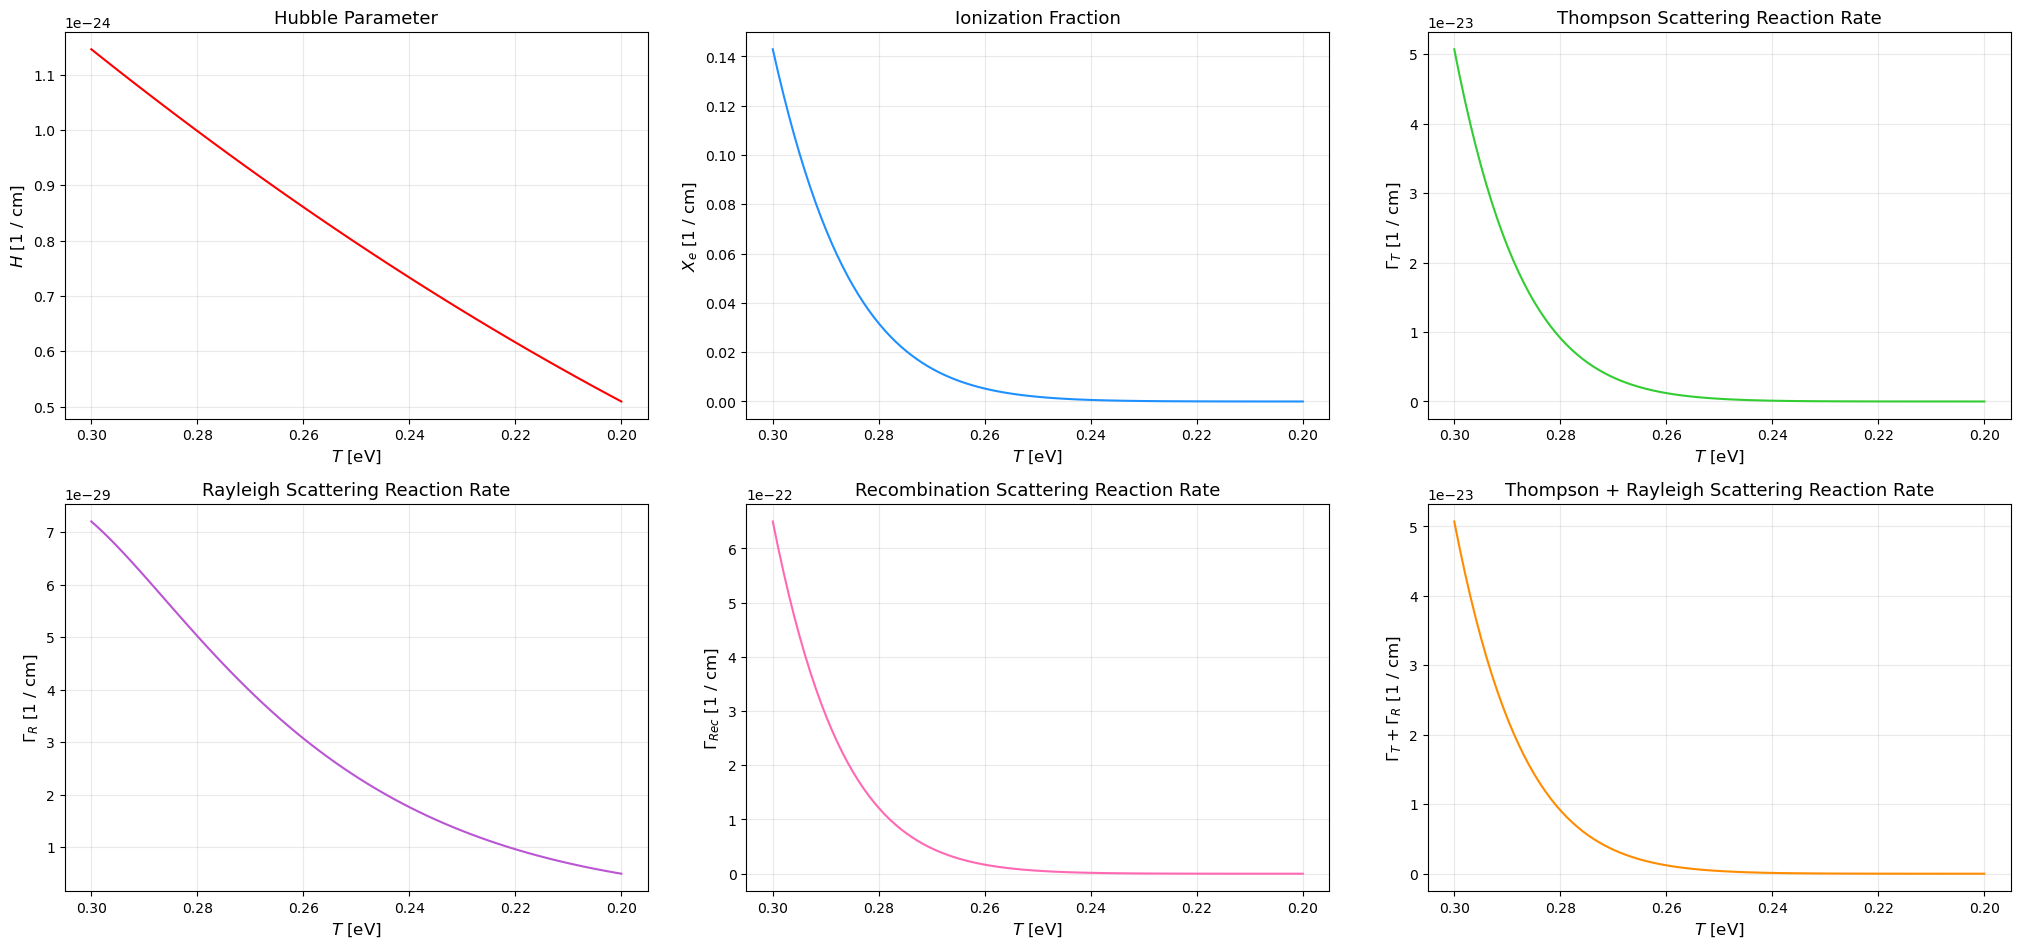

In [4]:
'''Range of temperatures'''
temps = np.linspace(0.2, 0.3, 100)


'''Calculate relevant data'''
H_list = [Hubble(T) for T in temps]
Xe_list = [Xe(T) for T in temps]
reactionTmp_list = [reactionTmp(T) for T in temps]
reactionRay_list = [reactionRay(T) for T in temps]
reactionRec_list = [reactionRec(T) for T in temps]
reactionTR_list = [Tmp + Ray for Tmp, Ray in zip(reactionTmp_list, reactionRay_list)]


'''Create figure and plots results'''
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (21, 10), gridspec_kw = {'width_ratios': [1, 1, 1],
                                                                                               'height_ratios': [1, 1]})
fig.tight_layout(pad = 4)
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xlabel('$T$ [eV]', fontsize = 12)
    ax.invert_xaxis()
    ax.grid(True, linestyle = 'solid', color = 'darkgray', alpha = 0.25)
    
'''First figure --> Hubble(T)'''
ax1.set_ylabel('$H$ [1 / cm]', fontsize = 12)
ax1.set_title('Hubble Parameter', fontsize = 13)
ax1.plot(temps, H_list, linestyle = 'solid', color = 'red')

'''Second figure --> Xe(T)'''
ax2.set_ylabel('$X_e$ [1 / cm]', fontsize = 12)
ax2.set_title('Ionization Fraction', fontsize = 13)
ax2.plot(temps, Xe_list, linestyle = 'solid', color = 'dodgerblue')

'''Third figure --> reactionTmp(T)'''
ax3.set_ylabel('$\Gamma_T$ [1 / cm]', fontsize = 12)
ax3.set_title('Thompson Scattering Reaction Rate', fontsize = 13)
ax3.plot(temps, reactionTmp_list, linestyle = 'solid', color = 'limegreen')

'''Fourth figure --> reactionRay(T)'''
ax4.set_ylabel('$\Gamma_R$ [1 / cm]', fontsize = 12)
ax4.set_title('Rayleigh Scattering Reaction Rate', fontsize = 13)
ax4.plot(temps, reactionRay_list, linestyle = 'solid', color = 'mediumorchid')

'''Fifth figure --> reactionRec(T)'''
ax5.set_ylabel('$\Gamma_{Rec}$ [1 / cm]', fontsize = 12)
ax5.set_title('Recombination Scattering Reaction Rate', fontsize = 13)
ax5.plot(temps, reactionRec_list, linestyle = 'solid', color = 'hotpink')

'''Sixth figure --> reactionTR(T)'''
ax6.set_ylabel('$\Gamma_T+\Gamma_R$ [1 / cm]', fontsize = 12)
ax6.set_title('Thompson + Rayleigh Scattering Reaction Rate', fontsize = 13)
ax6.plot(temps, reactionTR_list, linestyle = 'solid', color = 'darkorange')

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/ReactionRatesComparison.png')

##### (d) Estimate the temperature when $\Gamma_T+\Gamma_R$ becomes smaller than $H(T)$.  This is the temperature when the universe becomes transparent to photons.

##### (e) Estimate the temperature when the recombination rate becomes smaller than the expansion rate.  What is the fraction of hydrogen that remains ionized?

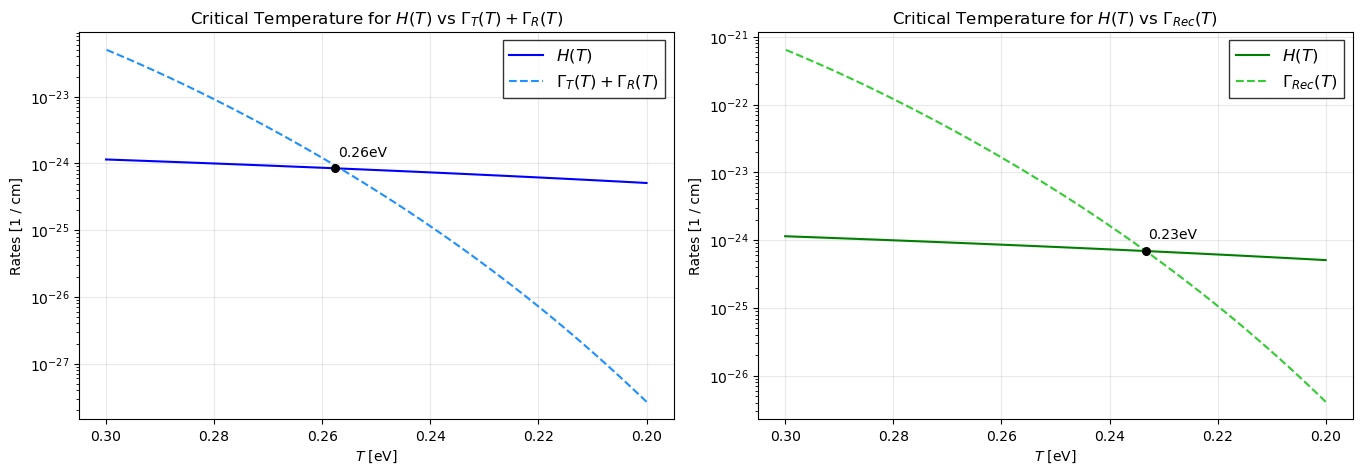

In [5]:
'''Find the temperature when Hubble parameter becomes larger than
   the sum of Thompson and Rayleigh scattering reaction rates'''
for T, TR, H in zip(temps, reactionTR_list, H_list):
    if TR >= H:
        tempTR = T    #temperature when True
        hubbleTR = H  #Hubble parameter when True
        break
    else:
        continue

        
'''Find the temperature when Hubble parameter becomes larger than Recombination reaction rate'''
for T, Rec, H in zip(temps, reactionRec_list, H_list):
    if Rec >= H:
        tempRec = T    #temperature when True
        hubbleRec = H  #Hubble parameter when True
        break
    else:
        continue
        
        
'''Create figure and plot results'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5), gridspec_kw = {'width_ratios': [1, 1]})
fig.tight_layout(pad = 3)
for ax in [ax1, ax2]:
    ax.set_xlabel('$T$ [eV]')
    ax.set_yscale('log')
    ax.invert_xaxis()
    ax.grid(True, linestyle = 'solid', color = 'darkgray', alpha = 0.25)
    
'''First figure --> Thompson + Rayleigh'''
ax1.set_ylabel('Rates [1 / cm]')
ax1.set_title('Critical Temperature for $H(T)$ vs $\Gamma_T(T)+\Gamma_R(T)$')
ax1.plot(temps, H_list, linestyle = 'solid', color = 'blue', label = '$H(T)$')
ax1.plot(temps, reactionTR_list, linestyle = 'dashed', color = 'dodgerblue', label = '$\Gamma_T(T)+\Gamma_R(T)$')
ax1.scatter([tempTR], [hubbleTR], s = 30, c = 'black', zorder = 5)
ax1.annotate(f'{tempTR:.2f}eV', xy = (tempTR - 0.005, hubbleTR + 6 * 10**-25), ha = 'center', va = 'center')
legend1 = ax1.legend(prop = {'size': 12}, loc = 'upper right', fancybox = False)
frame1 = legend1.get_frame()
frame1.set_facecolor('white')
frame1.set_edgecolor('black')
frame1.set_linewidth(1)

'''Second figure --> Recombination'''
ax2.set_ylabel('Rates [1 / cm]')
ax2.set_title('Critical Temperature for $H(T)$ vs $\Gamma_{Rec}(T)$')
ax2.plot(temps, H_list, linestyle = 'solid', color = 'green', label = '$H(T)$')
ax2.plot(temps, reactionRec_list, linestyle = 'dashed', color = 'limegreen', label = '$\Gamma_{Rec}(T)$')
ax2.scatter([tempRec], [hubbleRec], s = 30, c = 'black', zorder = 5)
ax2.annotate(f'{tempRec:.2f}eV', xy = (tempRec - 0.005, hubbleRec + 5 * 10**-25), ha = 'center', va = 'center')
legend2 = ax2.legend(prop = {'size': 12}, loc = 'upper right', fancybox = False)
frame2 = legend2.get_frame()
frame2.set_facecolor('white')
frame2.set_edgecolor('black')
frame2.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/CritialTemperatures_TR_Rec.png')